In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
from os.path import join
from google.colab import drive

In [4]:
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
Def = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Knot_Data/train/Defective/131600022.bmp')


# Reading the image file


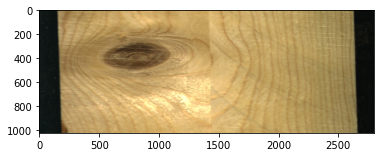

In [6]:
Def = cv2.cvtColor(Def,cv2.COLOR_BGR2RGB)
plt.imshow(Def)

## Preparing the data for the model
# Automatically process the data and generate a flow of batches
# Also we can do some changes/manipulate to our images


In [7]:
from keras.preprocessing.image import ImageDataGenerator

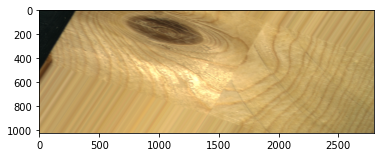

In [8]:
Image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest'
                               )

plt.imshow(Image_gen.random_transform(Def))

## Calling the images from the directory:
# once for the training, and once for the test (required in the next step: train & test)


In [9]:
Image_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Knot_Data/train')

Found 710 images belonging to 2 classes.


# Building the Model


In [23]:
input_shape = (150,150,3)

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

## Image training generation objects for the training and the testing


In [27]:
batch_size = 8
train_image_gen = Image_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Knot_Data/train', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')

Found 710 images belonging to 2 classes.


In [28]:
test_image_gen = Image_gen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Knot_Data/test', target_size=input_shape[:2], batch_size=batch_size, class_mode='binary')

Found 40 images belonging to 2 classes.


## To identify the class indices

In [29]:
train_image_gen.class_indices

{'Defective': 0, 'Healthy': 1}

### ======================( Training )======================


In [30]:
results = model.fit_generator(train_image_gen, epochs=100, steps_per_epoch=88, validation_data=test_image_gen, validation_steps=10)
model.save('/content/drive/MyDrive/Colab Notebooks/Knot_100epochs.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
88/88 [==============================] - 1033s 12s/step - loss: 0.6922 - accuracy: 0.5812 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/100
88/88 [==============================] - 132s 2s/step - loss: 0.6852 - accuracy: 0.5726
Epoch 3/100
88/88 [==============================] - 101s 1s/step - loss: 0.6823 - accuracy: 0.5983
Epoch 4/100
88/88 [==============================] - 80s 917ms/step - loss: 0.6794 - accuracy: 0.5826
Epoch 5/100
88/88 [==============================] - 76s 870ms/step - loss: 0.6600 - accuracy: 0.6368
Epoch 6/100
88/88 [==============================] - 79s 899ms/step - loss: 0.6546 - accuracy: 0.6325
Epoch 7/100
88/88 [==============================] - 78s 889ms/step - loss: 0.6564 - accuracy: 0.6396
Epoch 8/100
88/88 [==============================] - 77s 876ms/step - loss: 0.6107 - accuracy: 0.6852
Epoch 9/100
88/88 [==============================] - 78s 885ms/step - loss: 0.5729 - accuracy: 0.7336
Epoch 10/100
88/88 [========================

### ======================( Testing )=====================


In [31]:
from keras.models import load_model
new_model = load_model('/content/drive/MyDrive/Colab Notebooks/Knot_100epochs.h5')


In [32]:
Def_file = '/content/drive/MyDrive/Colab Notebooks/Knot_Data/test/Defective/100400072.bmp'
from keras.preprocessing import image
Def_img = image.load_img(Def_file, target_size=(150,150))
Def_img = image.img_to_array(Def_img)
import numpy as np
Def_img = np.expand_dims(Def_img, axis=0)
Def_img = Def_img/255


# Print the final result
#Defective < 0.5 , Healthy > 0.5

In [33]:
predict_x=model.predict(Def_img)
print('Prediction_Result:', predict_x)


Prediction_Result: [[1.6306133e-08]]
